In [1]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [3]:
gamma = 1 #strength of each vortex
x_vortices_start, x_vortices_end = -20.0, 20.0
Nv = 201 #number of vortices
y_vortices = np.zeros(Nv)
x_vortices = np.linspace(x_vortices_start, x_vortices_end, Nv)

In [4]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

In [5]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*np.log((X-xv)**2+(Y-yv)**2)
    return psi

In [6]:
u = 0
v = 0
for i in range(len(x_vortices)):
    ui, vi = get_velocity_vortex(gamma, x_vortices[i], y_vortices[i], X, Y)
    u = u + ui
    v = v + vi

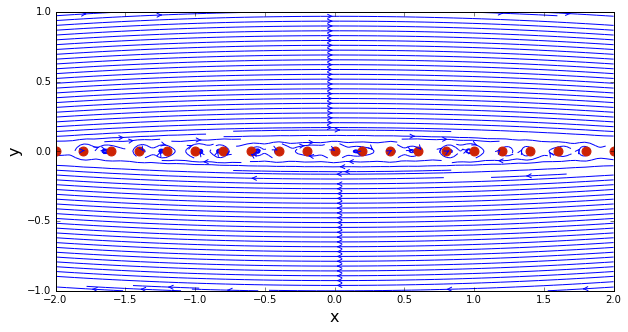

In [7]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortices, y_vortices, color='#CD2305', s=80, marker='o');

In [8]:
#infinite
a = (x_vortices_end-x_vortices_start)/Nv

In [9]:
u = np.zeros((N,N),dtype=float)
v = np.zeros((N,N),dtype=float)

In [10]:
a

0.19900497512437812

In [11]:
for g in range(N):
    for h in range(N):
        u[h,g] = gamma/(2*a)*np.sinh(2*math.pi*y[h]/a)/(np.cosh(2*math.pi*y[h]/a)-np.cos(2*math.pi*x[g]/a))
        v[h,g] = -gamma/(2*a)*np.sin(2*math.pi*x[g]/a)/(np.cosh(2*math.pi*y[h]/a)-np.cos(2*math.pi*x[g]/a))

In [12]:
u

array([[-2.5125, -2.5125, -2.5125, ..., -2.5125, -2.5125, -2.5125],
       [-2.5125, -2.5125, -2.5125, ..., -2.5125, -2.5125, -2.5125],
       [-2.5125, -2.5125, -2.5125, ..., -2.5125, -2.5125, -2.5125],
       ..., 
       [ 2.5125,  2.5125,  2.5125, ...,  2.5125,  2.5125,  2.5125],
       [ 2.5125,  2.5125,  2.5125, ...,  2.5125,  2.5125,  2.5125],
       [ 2.5125,  2.5125,  2.5125, ...,  2.5125,  2.5125,  2.5125]])

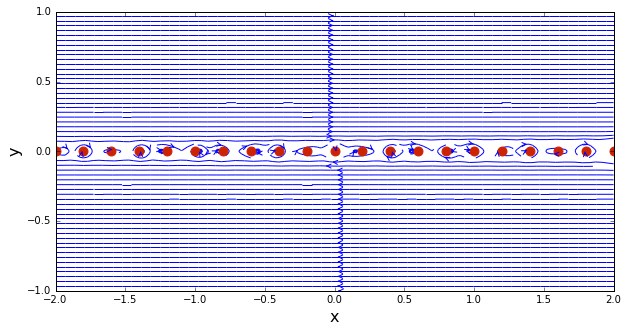

In [13]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortices, y_vortices, color='#CD2305', s=80, marker='o');